<a
href="https://angeloyeo.github.io/2021/04/23/binomial_distribution.html"> 이항분포</a>

$$ Pr(K=k) = \binom{n}{k} p^{k}(1-p)^{n-k} $$
$$ 동전을 n번 던져서 k번 앞면이 나올 확률이 p이고 뒷면이 나올 확률은 전체 확률이 1이므로 $$
$$ 전체 확률 1에서 앞면이 나올확률(p)를 뺀 것이 1-p이고 그것의 갯수도 전체 횟수(n)에서 앞면이 나올 횟수(k)를 빼면됨 $$
$$ log는 단조 증가 함수이므로 log를 취해도 문제가 되지 않는다 $$
$$ log (p^{k}(1-p)^{n-k}) = klogp +(n-k)log(1-p) $$
## logistic regression의 cost 함수 =
$$ J(W,b) = \frac{1}{m}\sum_{i=1}^{m}L(\widehat{y}^{(i)},y^{(i)}) =
    -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\widehat{y}^{(i)}+ (1-y^{(i)})log(1-\widehat{y}^{(i)})] $$
    
### Cross Entropy

$$ 선형 회귀의 결과(z)를 sigmoid의 입력으로 들어간다 $$
$$ z = w_{1}x_{1}+ w_{2}x_{2} + w_{3}x_{3} + b $$
$$ z = \sum_{i=1}^{3}w_{i}x_{i} + b $$
$$ z = w^{T}x+b \rightarrow 벡터 표기법 $$

$$ \sigma(z) = g(z) = \frac{1}{1+e^{-z}} $$


<img src="neuron.png"/>

<img src="a.gif"/>

<img src="n2.jpg"/>

In [5]:
import numpy as np

In [7]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

## Hypothesis (가설)
$$ \frac{1}{1+e^{-(w \cdot x+b)}} $$

## 손실(Loss)/Cost(비용) 함수
## logistic regression의 cost 함수 =
$$ J(W,b) = \frac{1}{m}\sum_{i=1}^{m}L(\widehat{y}^{(i)},y^{(i)}) =
    -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\widehat{y}^{(i)})+ (1-y^{(i)})log(1-\widehat{y}^{(i)})] $$

In [8]:
def loss(y,y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

## 경사 하강법(Gradient Descent)
$$ w := w-lr \cdot dw \rightarrow lr = learig rate(학습율) $$
$$ b := b-lr \cdot dw \rightarrow b = basis $$

## 미분 결과
$$ dw = \frac{1}{m} \cdot (\widehat{y}-y) \cdot X $$
$$ db = \frac{1}{m} \cdot (\widehat{y}-y) $$ => Linear Regression의 MSE 미분과 동일

In [11]:
def gradients(X, y, y_hat):
    # x ---> 입력
    # y ---> 정답(target / label)
    # y_hat ---> 가설(모델의 출력, hypothesis/예측치(prediction/추정))
    # w ---> weight (파라미터, theta / 우리가 구하고자 하는 값)
    # b ---> bias (파라미터, theta 0)
    
    # m ---> 학습(trainging) 데이터의 갯수
    m = X.shape[0]
    
    # Cost(Loss)를 weight로 미분함
    dw = (1/m)*np.dot(X.T , (y_hat-y))
    
    # Cost(Loss)를 bias로 미분함
    db = (1/m)*np.sum((y_hat-y))
    
    return dw, db

## decision boundary
$$ y= 1 \leftarrow \widehat{y} \ge 0.5 $$
$$ y=0 \leftarrow \widehat{y} \lt 0.5 $$

In [5]:
def plot_decision_boundary(X, w, b):
    # X = 입력
    # w = 가중치
    # b = bais
    
    # 직선은 y =mx +c
    # 그래서 직선의 방정식 mx+c = w.X +b
    # m과 c를 풀어라
    x1 = [min(x[:,0]), max(X[:0])] # X[:,0] X의 모든행을 가져오고 0열 선택
    m = -b/w[1]
    x2 = m*x1 +c
    
    #그림 그리기
    fig = plt.figure(figsize=(10,0))
    plt.plot(X[:,0][y==0],X[:,1][y==0],"g^")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
    plt.xlim([-2,2]) # x구간 지정
    plt.ylim([0,2.2]) #ylimit (y 구간지정)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Decision Boundary")
    plt.plot(x1, x2, 'y-')

## Normalize(정규화) 함수
함수 분포가 찌그러져있을 경우 원형의 형태로 변형해야 함

In [13]:
import numpy as np

In [7]:
def normalize(X):
    # X <= 입력
    # m <= training 개수
    # n <= feature 의 갯수 (weight 와 내적하는 것)
    m, n= X.shape #(m ,n) m행 n열
    # X 행렬의 모든 n개의 feature들을 정규화함
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0) 
        #어제 했던 수식(데이터와 평균의 차이를) 표준편차(standard deviation)으로 나눔
    return X

In [8]:
#Train 함수
## 이 함수에서 gradient descent를 반복하여 학습을 하고 weight 와 bais를 구함
def train(X, y, bs, epochs, lr): #epoch는 반복횟수
    # X <- 입력
    # y <- true / target
    # epoch는 반복횟수
    # lr = learning rate(학습율)
    
    #m <- 학습데이터의 수
    #n <- feature의 수
    
    m,n = X.shape
    #weight 와 bias 초기화
    w = np.zeros((m,1))
    b=0
    # y를 reshape함(형태를 맞춤)
    y=y.reshape(m,1)
    #입력 데이터 normalize
    x = normalize(X)
    #LOSS를 저장하기 위한 빈 LIST 생성
    losses = []
    # 학습
    for epoch in range(epochs):
        for i in range((m-1)//bs+1):
            #batch 정의, SGD(Stocastric(통계적0), Gradient Descent)
            start_i = i*bs # bs(배치 사이즈)
            end_i = start_i +bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            #hypothesis / 예측 계산
            y_hat = sigmoid(np.dot(xb,w)+b)
            #loss를 파라미터로 미분
            dw, db = gradient(xb, yb, y_hat)
            #파라미터 갱신
            w -= lr*dw
            b -= lr*db
        l= loss(y, sigmoid(np.dot(X,w)+b))
        losses.append(l)
    # weight 와 bias, loss 반환
    return w,b, losses

In [9]:
# 예측 함수
def predict(X):
    # X <- 입력
    # 입력 데이터 normalize
    x = normalize(X)
    
    # 예측/ 추정치/ y_hat 계산
    preds = sigmoid(np.dot(X,w)+b)
    # 예측 데이터 저장 리스트 생성
    pred_class=[]
    #y_hat >= 0.5 -> 1로 결과를 출력
    #y_hat < 0.5 -> 0 결과를 출력
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

In [11]:
from sklearn.datasets import make_moons

In [12]:
# 학습
X, y = make_moons(n_samples=100, noise=0.24)
w, b, l = train(X,y,bs=100,epochs=1000,lr=0.01)
#그림 그리기
plot_decision_boundary(X,w,b)

NameError: name 'np' is not defined

In [12]:
X = np.arange(-3,3,0.01)
y=sigmoid(X)

$$ \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $$

In [17]:
def derivative(f,x):
    h=0.00001
    return (f(x+h)-f(x))/h

In [20]:
derivated = derivative(sigmoid,X)

In [13]:
import matplotlib.pyplot as plt

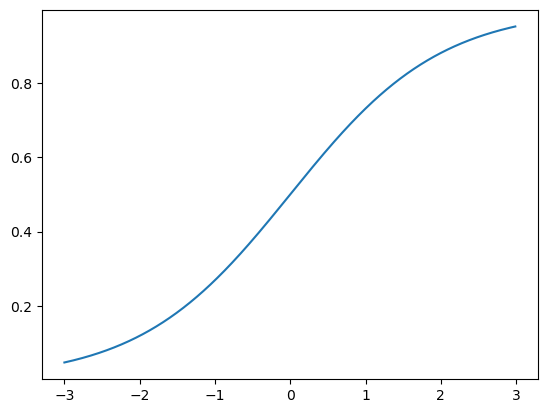

In [14]:
plt.plot(X, y)

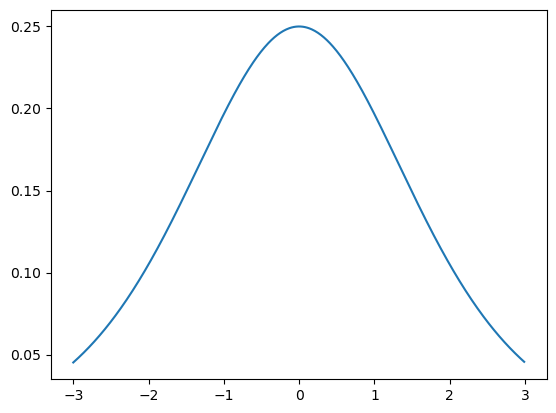

In [21]:
plt.plot(X, derivated)

##  Hessian 행렬
$$   \begin{bmatrix}
 \frac{\partial^{2}f}{\partial x_{1}^2} &  \frac{\partial^{2}f}{\partial x_{1} \partial x_{2} }  & \cdot  \cdot \cdot  &  \frac{\partial^{2}f}{\partial x_{1} \partial x_{n} }    \\
\frac{\partial^{2}f}{\partial x_{2} \partial x_{1}} &
\frac{\partial^{2}f}{\partial x_{1}^2}  & \cdot  \cdot \cdot  &  
  \frac{\partial^{2}f}{\partial x_{2}\partial x_{n}}   \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^{2}f}{\partial x_{n} \partial x_{1} } &  \frac{\partial^{2}f}{\partial x_{n} \partial x_{2} }  & \cdot  \cdot \cdot  &  \frac{\partial^{2}f}{\partial x_{n}^{2}}   
\end{bmatrix} $$

<a href="https://angeloyeo.github.io/2020/06/17/Hessian.html"> 헤시안 행렬의 기하학 의미 </a>

In [1]:
from sympy import symbols , Matrix , Function, simplify, exp, hessian, solve, init_printing
x1, x2 = symbols('x1 x2')
f, g, h =symbols('f g h' , cls=Function)

X = Matrix([x1, x2])
f = Matrix([-x1*x2*exp(-(x1**2+x2**2)/2)])
h = 2*x1+3*x2
g = x1**2+x2**2-10

In [2]:
gradf = simplify(f.jacobian(X))
gradf

Matrix([[x2*(x1**2 - 1)*exp(-x1**2/2 - x2**2/2), x1*(x2**2 - 1)*exp(-x1**2/2 - x2**2/2)]])

In [3]:
hessian = simplify(hessian(f,X))
hessian

Matrix([
[                 x1*x2*(3 - x1**2)*exp(-x1**2/2 - x2**2/2), (-x1**2*x2**2 + x1**2 + x2**2 - 1)*exp(-x1**2/2 - x2**2/2)],
[(-x1**2*x2**2 + x1**2 + x2**2 - 1)*exp(-x1**2/2 - x2**2/2),                  x1*x2*(3 - x2**2)*exp(-x1**2/2 - x2**2/2)]])